In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import print_function
import os                                    
import sys
import keras
import tensorflow as tf
import numpy as np 
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# BusterNet based Copy-Move Forgery Detection (CMFD)

### For details of module architectures and reasons why we design the BusterNet in its current way, please refer to the source code and the paper expalinations.

In [2]:
print("INFO: this notebook has been tested under keras.version=2.2.2, tensorflow.version=1.8.0")
print("INFO: here is the info your local")
print("      keras.version={}".format( keras.__version__ ) )
print("      tensorflow.version={}".format( tf.__version__ ) )
print("INFO: consider to the suggested versions if you can't run the following code properly.")

INFO: this notebook has been tested under keras.version=2.2.2, tensorflow.version=1.8.0
INFO: here is the info your local
      keras.version=2.2.2
      tensorflow.version=1.8.0
INFO: consider to the suggested versions if you can't run the following code properly.


# Task #1: Create the busterNet model with pretrained weights

This pretrained BusterNet is wrapped in such a way that it could accept either of the following two cases:
- a. a uint8 RGB image
- b. a normalized image tensor (substract the VGG16's imageNet mean)

In [3]:
from BusterNetCore import create_BusterNet_testing_model
busterNetModel = create_BusterNet_testing_model( './pretrained_busterNet.hd5' )

INFO: successfully load pretrained weights from ./pretrained_busterNet.hd5


In [4]:
print( busterNetModel.summary() )

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_in (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
preprocess (Preprocess)         (None, 256, 256, 3)  0           image_in[0][0]                   
__________________________________________________________________________________________________
simiFeatex (Model)              (None, 256, 256, 6)  7735568     preprocess[0][0]                 
__________________________________________________________________________________________________
maniFeatex (Model)              (None, 256, 256, 6)  7789694     preprocess[0][0]                 
__________________________________________________________________________________________________
merge (Con

# Task #2: Perform CMFD using the BusterNet

In [5]:
lmdb_dir = '../Data/USCISI-CMFD-Small'
sys.path.insert(0,lmdb_dir)
from api import USCISI_CMD_API
from BusterNetUtils import *

In [6]:
dataset = USCISI_CMD_API( lmdb_dir=lmdb_dir,
                          sample_file=os.path.join( lmdb_dir, 'samples.keys' ),
                          differentiate_target=True )

INFO: successfully load USC-ISI CMD LMDB with 100 keys


INFO: use random key COCO_val2014_000000367313-00-T0-X486392
INFO: use random key COCO_val2014_000000110369-00-T0-X554517
INFO: use random key COCO_train2014_000000038965-01-T0-X201768
INFO: use random key COCO_val2014_000000356394-02-T0-X580936
INFO: use random key COCO_train2014_000000038965-01-T0-X201768
INFO: use random key COCO_train2014_000000372702-02-T0-X1088662
INFO: use random key COCO_train2014_000000347111-11-T0-X741861
INFO: use random key COCO_train2014_000000346132-01-T0-X294969
INFO: use random key COCO_val2014_000000552018-02-T0-X758025
INFO: use random key COCO_train2014_000000198249-00-T0-X1233099


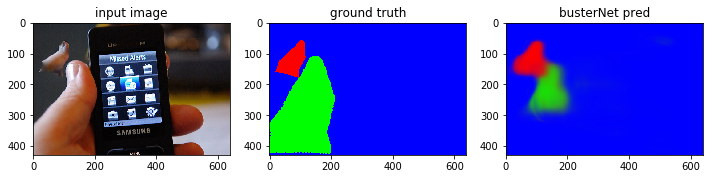

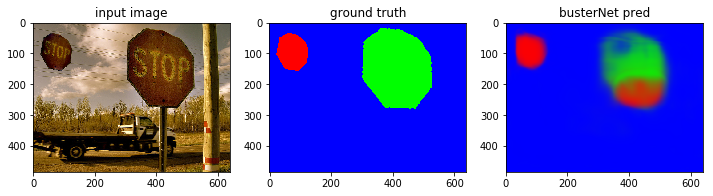

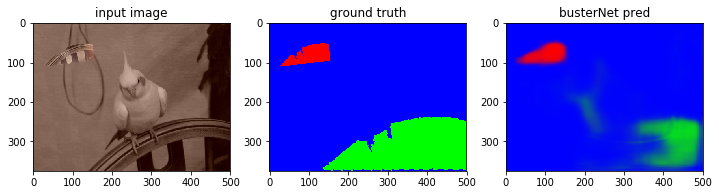

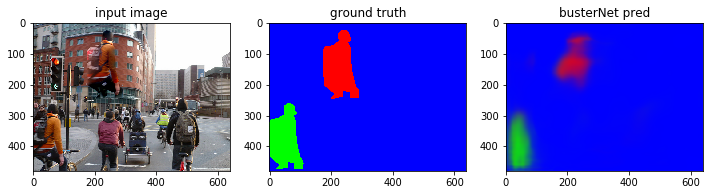

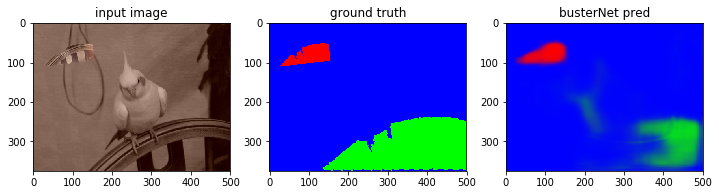

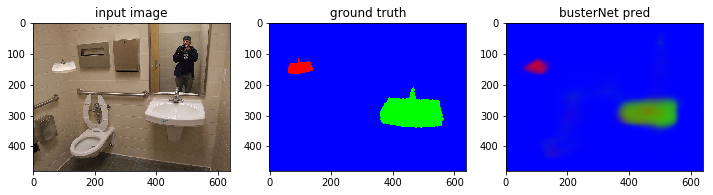

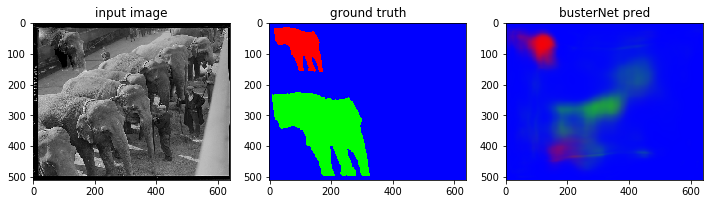

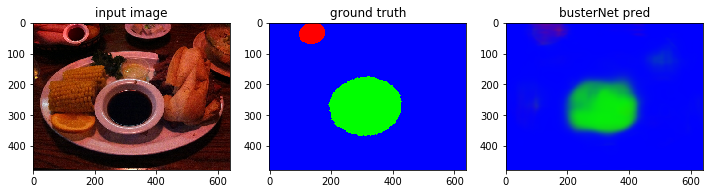

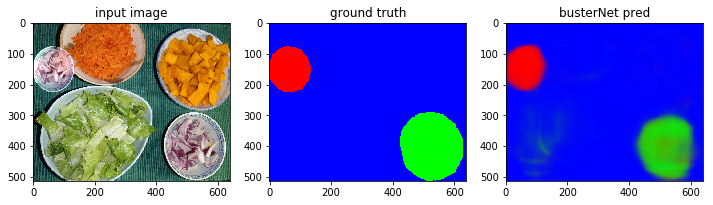

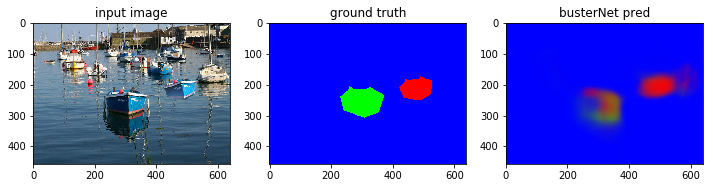

In [7]:
for k in range(10) :
    rgb, gt, trans_mat = dataset.get_one_sample()
    pred = simple_cmfd_decoder( busterNetModel, rgb )
    visualize_result( rgb, gt, pred )